In [64]:
using Plots
using CSV
using DataFrames
using Statistics
using Random

In [8]:
# Read CSV
X = DataFrame(CSV.File("./data/housing.csv"))
# X = CSV.read("./data/housing.csv", DataFrame) # 同義

,RM,LSTAT,PTRATIO,MEDV
,Float64,Float64,Float64,Float64
1,6.575,4.98,15.3,504000.0
2,6.421,9.14,17.8,453600.0
3,7.185,4.03,17.8,728700.0
4,6.998,2.94,18.7,701400.0
5,7.147,5.33,18.7,760200.0
6,6.43,5.21,18.7,602700.0
7,6.012,12.43,15.2,480900.0
8,6.172,19.15,15.2,569100.0
9,5.631,29.93,15.2,346500.0


In [96]:
# Preprocessing
# DataFrame to Matrix
X = Matrix(X)

# Normalization
function normalizer(X)
    m = mean(X, dims=1)
    s = std(X, dims=1)
    return (X .- m)./s # broadcast = ".-", ".*"
end

X = normalizer(X)

# Train-Test split
function train_test_split(data, ratio)
    n = size(data)[1]
    idx = shuffle(1:n)
    train = data[1:Int(round(n * ratio)), :]
    test = data[Int(round(n * ratio))+1:n, :]
    return train, test
end

train_X, test_X = train_test_split(X, 0.8)

([0.5200214088604531 -1.123925921798203 -1.523522913685517 0.300332477480406; 0.28076085302601855 -0.5365203869267462 -0.33940010741649457 -0.004493428920185934; … ; -3.266199205220828 1.4685658138363995 0.7973577866017661 -1.2364981339559116; -0.9823484449830432 -0.11432265873788648 0.7973577866017661 0.7956745753813678], [-0.9683656852264848 1.9006477697754998 0.7973577866017661 -0.5633409239879378; 0.9503796813678455 0.9658822311098645 0.7973577866017661 0.7448702576479357; … ; 0.8602685629366936 -0.9121210414358989 1.1762770846078536 0.04631088881324604; -0.32671237639777334 -0.7144364864310817 1.1762770846078536 -1.2364981339559116])

In [106]:
# Supervised learning (Random Forest)
using DecisionTree

# Train the model
model = build_forest(train_X[:,4], train_X[:,1:3])

# Prediction
pred = apply_forest(model, test_X[:,1:3])

98-element Vector{Float64}:
 -1.4675731057801382
 -0.29716057181878064
 -0.2474237495710571
 -0.8147119183400171
 -1.2892771671345773
 -1.4936999409539173
 -1.2892771671345773
 -1.3337778181825728
 -0.6163316418238262
 -1.5322216000959303
 -1.5115127924864935
 -0.3006745371286764
 -0.5165283740764182
  ⋮
 -0.2666442124357836
 -0.34874509871740467
 -0.8006227923685852
 -0.29649174910417486
 -0.08014196524522567
 -0.2837886536264624
 -0.10635457394245118
 -0.03494729092819351
 -0.01956537651443743
  1.068412615824629
  0.683629886313428
 -0.09383796256753005

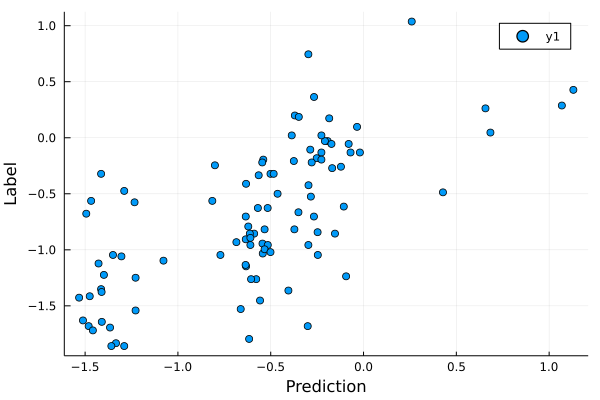

In [112]:
plot(pred, test_X[:,4], st=:scatter,
    xlabel="Prediction", 
    ylabel="Label",
    )

In [136]:
# Supervised learning (SVM)
using SVR

# Train the model
model = SVR.train(train_X[:,4], permutedims(train_X[:,1:3]))

# Prediction
pred = SVR.predict(model, permutedims(test_X[:,1:3]))

┌ Info: Dependent variables will be normalized!
└ @ SVR /Users/takumibannai/.julia/packages/SVR/pHNq6/src/SVRfunctions.jl:35


98-element Vector{Float64}:
 0.10114206152474786
 0.11794385296296722
 0.338532671487581
 0.15416582126825146
 0.19140684923756265
 0.17784789152374875
 0.2452009147826434
 0.19201950194112505
 0.1939556722019472
 0.09207584266299318
 0.22125863898761872
 0.13637552075867537
 0.29510281613105255
 ⋮
 0.33457377823276285
 0.29735727504380155
 0.26469514254179655
 0.320317904641168
 0.34607671115129973
 0.29349384742513956
 0.3352979101954227
 0.4004657819955091
 0.36061480180097355
 0.531861511168014
 0.4795140432294439
 0.35705270324019706

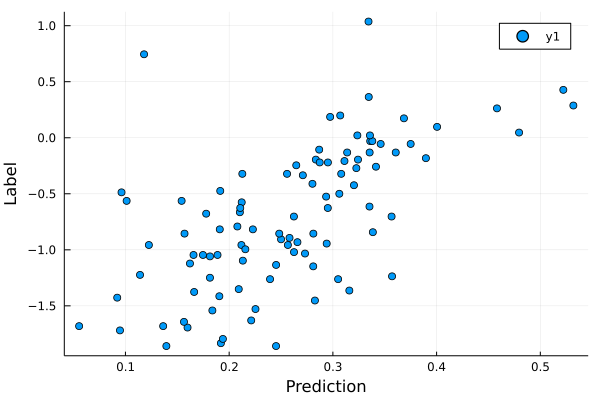

In [137]:
plot(pred, test_X[:,4], st=:scatter,
    xlabel="Prediction", 
    ylabel="Label",
    )
